## Created by Chaitanya Saradhi Eerla
### Internship at Plasmid Innovation

### <u>Introduction</u>
We're analyzing a dataset on online payment fraud within a specific timeframe.

### <u>Aim</u>
Develop a machine learning model to accurately detect fraud while avoiding overfitting.

#### <u>Results</u>
**Random Forest Results:**
- Accuracy: 0.9995
- AUC-ROC: 0.9685

**Logistic Regression Results:**
- Accuracy: 0.9987
- AUC-ROC: 0.7980

### <u>Total execution Time</u> : ~20 minutes

### Given dataset description
Online Payments Fraud Detection


- **step**: Represents a unit of time, where 1 step equals 1 hour.
- **type**: Type of online transaction.
- **amount**: The amount of the transaction.
- **nameOrig**: The customer initiating the transaction.
- **oldbalanceOrg**: The balance before the transaction.
- **newbalanceOrig**: The balance after the transaction.
- **nameDest**: The recipient of the transaction.
- **oldbalanceDest**: The initial balance of the recipient before the transaction.
- **newbalanceDest**: The new balance of the recipient after the transaction.
- **isFraud**: Indicates whether the transaction is fraudulent (1) or not (0).

In [13]:
# now lets Import the basic libraries for machine modeling
import numpy as np
import pandas as pd

In [14]:
# now lets import our dataset
df = pd.read_csv("dataset\Online_fraud.csv")

In [15]:
# now lets print to check if the import is working properly 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Now that the import is working properly, let's move onto the next step: analyzing the given dataset.

Upon further inspection, there are 10 relevant columns provided in the dataset description:

1. **type**: The 'type' column may poorly identify whether a transaction is fraudulent or not because it primarily categorizes the type of online transaction (e.g., payment, transfer, withdrawal) rather than directly indicating fraudulent behavior. Fraudulent transactions can occur across various transaction types, making it difficult to discern fraudulent activity solely based on the 'type' column.

2. **newbalanceOrig** and **newbalanceDest**: We don't need 'newbalanceOrig' and 'newbalanceDest' because we already have 'amount' to show how much money is moved. Having both can make things confusing for the model.

3. **nameDest**: 'nameDest' might not be helpful for fraud detection because it's just the recipient's name. Fraudsters can use different names for each transaction or manipulate the recipient's name to hide their activities. 

4. **nameOrig**: The 'nameOrig' column, representing the customer's account name, is not typically relevant for fraud detection algorithms as it does not directly indicate fraudulent behavior. Including it in the model may add unnecessary complexity without significant predictive value.

hence lets remove these columns in our dataset

In [16]:
# List of columns to drop
columns_to_drop = ['type', 'newbalanceOrig', 'newbalanceDest', 'nameDest', 'nameOrig' ]

# Dropping the specified columns
df.drop(columns=columns_to_drop, inplace=True)

Now we are left with the following columns. Let's examine each one to understand their impact on predicting whether a transaction is fraudulent or not.

To facilitate our analysis, let's import the Matplotlib library. This will enable us to visualize how each column affects predictability.


In [17]:
import matplotlib.pyplot as plt

starting off with the "step" column

now remember
- **step**: Represents a unit of time, where 1 step equals 1 hour.

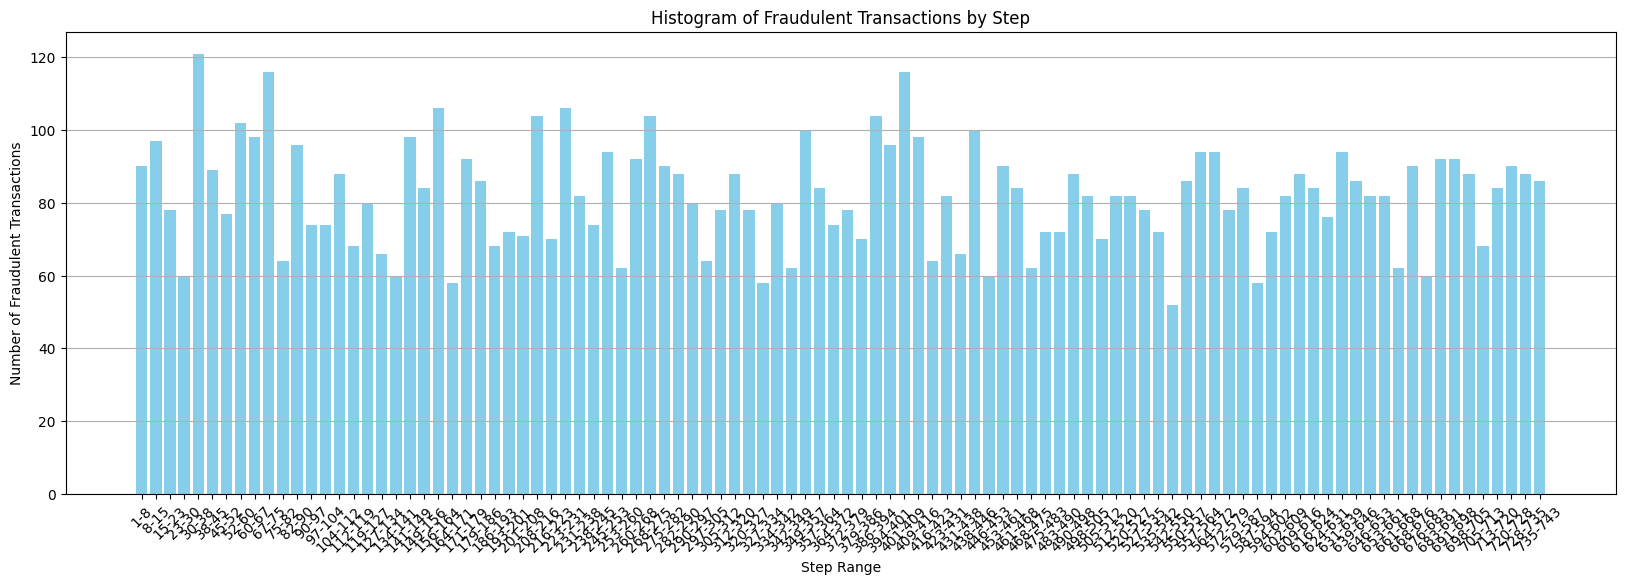

In [18]:
# Determine the maximum value of the 'step' column
max_step = df['step'].max()

# Define the number of bins for the histogram based on the maximum 'step' value
num_bins = min(max_step, 100)

# Calculate the histogram of 'step' values with specified number of bins
hist, bins = np.histogram(df['step'], bins=num_bins)

# Calculate the number of fraudulent transactions in each bin
fraud_counts = []
for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    fraud_count = df[(df['step'] >= lower_bound) & (df['step'] < upper_bound)]['isFraud'].sum()
    fraud_counts.append(fraud_count)

# Plot the histogram
plt.figure(figsize=(20, 6))
plt.bar(range(num_bins), fraud_counts, color='skyblue')
plt.title('Histogram of Fraudulent Transactions by Step')
plt.xlabel('Step Range')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(num_bins), ['{}-{}'.format(int(bins[i]), int(bins[i + 1])) for i in range(len(bins) - 1)], rotation=45)
plt.grid(axis='y')
plt.show()

The 'step' column, representing the timing of transactions, does not significantly discriminate between fraudulent and non-fraudulent transactions, as evidenced by the relatively uniform distribution of fraudulent transactions across different step ranges. Therefore, excluding the 'step' column can be an option as it does not provide significant discriminatory power for identifying fraudulent transactions.

Now lets go onto our next column
- **amount**: The amount of the transaction.

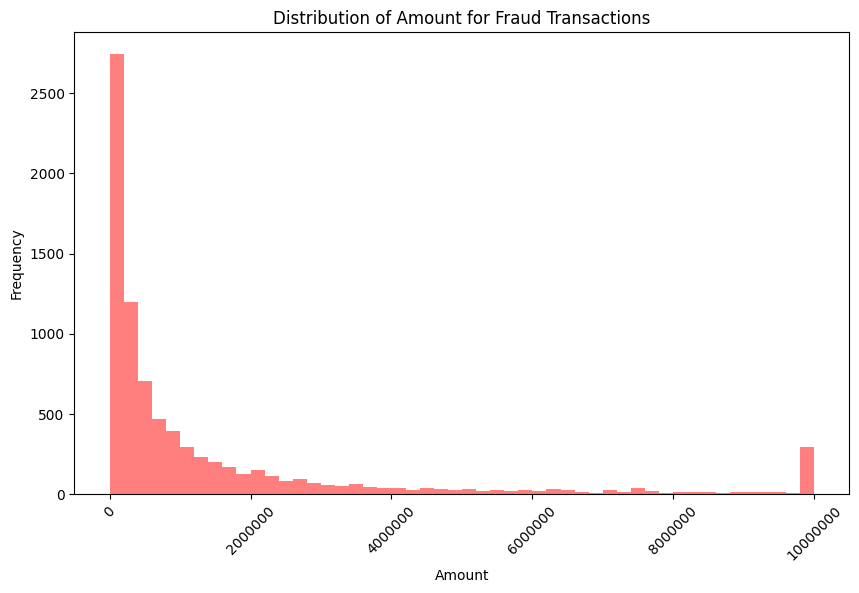

In [19]:

fraud_amounts = df[df['isFraud'] == 1]['amount']

plt.figure(figsize=(10, 6))
plt.hist(fraud_amounts, bins=50, alpha=0.5, color='red')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount for Fraud Transactions')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Now looking at the graph we can clearly tell that "amount" column can do a good job in identifying weather which transaction is a fraud or not, you can tell by looking at the graph,so lets use it for our model.

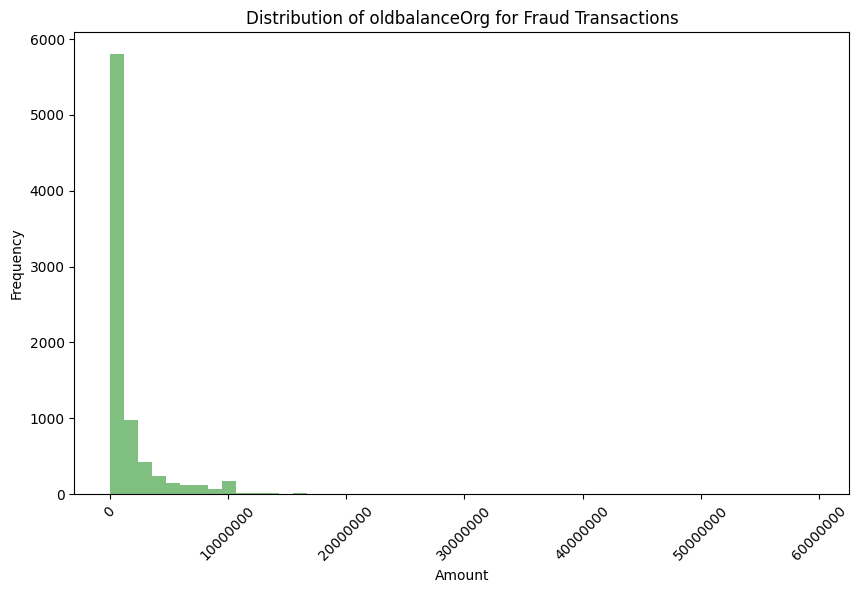

In [20]:

OldBalanceOrgs = df[df['isFraud'] == 1]['oldbalanceOrg']

plt.figure(figsize=(10, 6))
plt.hist(OldBalanceOrgs, bins=50, alpha=0.5, color='green')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of oldbalanceOrg for Fraud Transactions')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

now looking at the graph we can tell that the column is also doing a good job in identifying weather the transaction is a fraud or not as high values have lower fraudulant transactions

now lets check the final column weather it would prove itself worthy of being added to create the model which is the "oldbalanceDest" column now in the same manner lets check it with the help of graphs

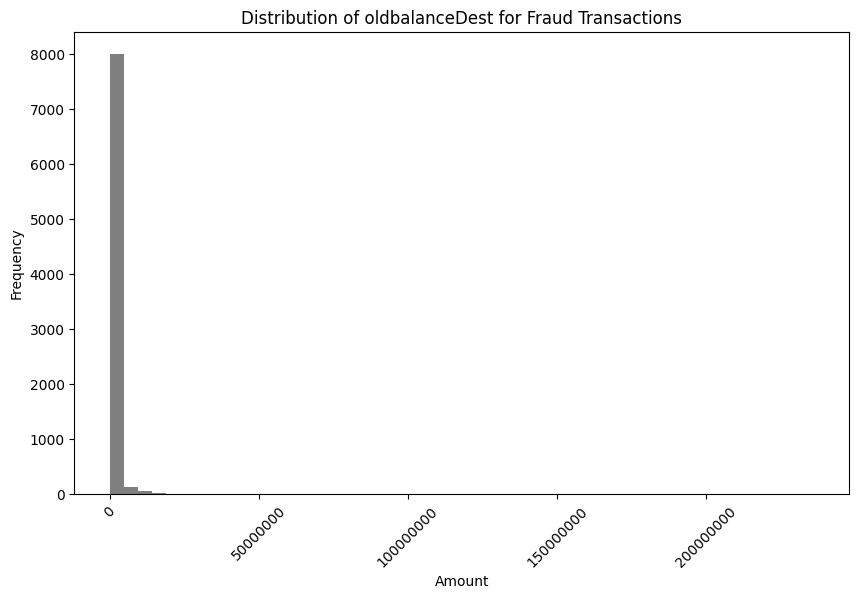

In [21]:

oldbalanceDests = df[df['isFraud'] == 1]['oldbalanceDest']

plt.figure(figsize=(10, 6))
plt.hist(oldbalanceDests, bins=50, alpha=0.5, color='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of oldbalanceDest for Fraud Transactions')

# Set x-axis ticks to display in regular decimal notation
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Given the heavily skewed distribution observed in the histogram of "oldbalanceDest" for fraud transactions, it's evident that fraudsters typically move money promptly upon receipt. This one-sided distribution, where most transactions have relatively low balances, aligns with the typical behavior of fraudsters attempting to quickly transfer funds out of compromised accounts.

Despite the skewed distribution, the concentration of transactions towards lower balances seems to serve as a reliable indicator for identifying fraudulent activity. This behavior aligns with the expectation that fraudsters aim to swiftly move funds, thereby making the "oldbalanceOrg" feature potentially valuable for fraud detection.


Now, since our 'step' column isn't a great option for predicting whether the transaction is fraud or not, let's remove it from our dataframe.

In [22]:
df.drop(columns=['step'], inplace=True)

df.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,0.0,0,0
1,1864.28,21249.0,0.0,0,0
2,181.00,181.0,0.0,1,0
3,181.00,181.0,21182.0,1,0
4,11668.14,41554.0,0.0,0,0


It's regrettable that we're limited to just three columns, as a broader range of data types could offer greater clarity on whether a feature will effectively determine the fraudulent nature of a transaction. Additional dimensions of information could enrich our analysis, providing deeper insights into the patterns and behaviors indicative of fraud.

Now lets look at our dataframe a bit more clearly about the term "Overbalanced" as they are pretty common in huge datasets

In [23]:

total_ones_isFraud = df['isFraud'].sum()
total_zeros_isFraud = len(df) - total_ones_isFraud

print("Total number of 1s in 'isFraud':", total_ones_isFraud)
print("Total number of 0s in 'isFraud':", total_zeros_isFraud)


Total number of 1s in 'isFraud': 8213
Total number of 0s in 'isFraud': 6354407


Now its pretty clear our dataset is heavily over balanced so going in that regard some good models to use are 

- **Logistic Regression**: Despite its simplicity, logistic regression can perform well on imbalanced datasets, especially when the features exhibit clear separation between classes. It's interpretable and computationally efficient.

- **Random Forest**: Random Forest is robust and can handle imbalanced datasets effectively. It builds multiple decision trees and combines their predictions, which can mitigate overfitting. It's also insensitive to outliers and works well with categorical features.

and many more but lets stick to these as they are most commanly used

Now, let's import the necessary libraries to prepare our data for model training and automate the process using built-in functions provided by the scikit-learn library.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score, roc_curve
import seaborn as sns

In [25]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
}

Now, let's split the data into training and testing sets, a crucial step typically done efficiently using the built-in functions provided by scikit-learn

In [26]:
features = df[['oldbalanceOrg', 'oldbalanceDest', 'amount']]
target = df['isFraud']

# Splitting the data into train and test sets (with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)


Now lets put in the data into the models and check how they work!

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.9987426563271106
AUC-ROC: 0.7979563654570136
Confusion Matrix:
 [[1270877       4]
 [   1596      47]]


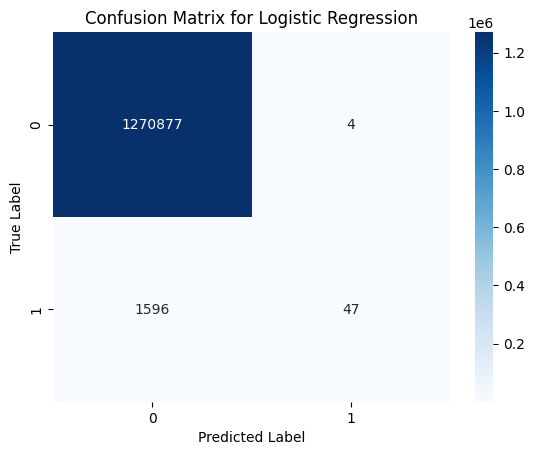

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.03      0.06      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.51      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524

Training Random Forest...

Random Forest Results:
Accuracy: 0.9995017775696176
AUC-ROC: 0.9685273496850374
Confusion Matrix:
 [[1270768     113]
 [    521    1122]]


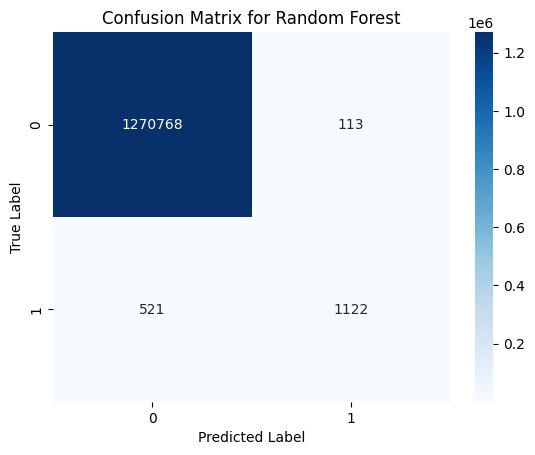

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.91      0.68      0.78      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [27]:
# Training and evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # AUC-ROC calculation
    auc_roc = roc_auc_score(y_test, y_proba)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC:", auc_roc)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

### <u>Conclusion</u>:

The Logistic Regression model achieved an accuracy of 99.87% but demonstrated moderate discrimination ability with an AUC-ROC score of 0.80. It exhibited high precision but low recall for identifying fraudulent transactions.

In contrast, the Random Forest model achieved higher accuracy (99.95%) and demonstrated superior discrimination ability with an AUC-ROC score of 0.97. It balanced precision and recall better, resulting in improved performance in identifying fraudulent transactions.

Overall, while both models achieved high accuracy, the **Random Forest model** outperformed the Logistic Regression model in discriminating between fraudulent and non-fraudulent transactions, making it preferable for fraud detection tasks.
